In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data_science_job.csv')

In [3]:
df.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0


### Missing Data %

In [4]:
(df.isnull().mean()*100).round(1)

enrollee_id                0.0
city                       0.0
city_development_index     2.5
gender                    23.5
relevent_experience        0.0
enrolled_university        2.0
education_level            2.4
major_discipline          14.7
experience                 0.3
company_size              31.0
company_type              32.0
training_hours             4.0
target                     0.0
dtype: float64

In [5]:
df.shape

(19158, 13)

### Selecting column below 5%

In [6]:
cols = [col for col in df.columns if df[col].isnull().mean() < 0.05 and df[col].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [7]:
df[cols].sample(3)  

,city_development_index,enrolled_university,education_level,experience,training_hours
11733,0.698,Part time course,Graduate,20.0,90.0
7208,0.624,Full time course,Graduate,2.0,182.0
4762,0.920,no_enrollment,NaN,9.0,13.0


### Data still with us %

In [8]:
round(len(df[cols].dropna()) / len(df), 2 )

0.9

In [9]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

### Plotting (CCA)

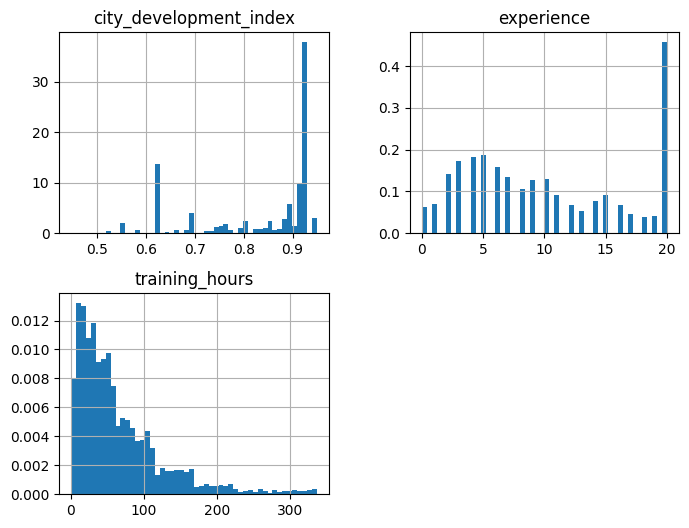

In [10]:
new_df.hist(bins = (50), density= True, figsize= (8, 6), grid = True)
plt.show()

### Plot Histogram: Training Hours

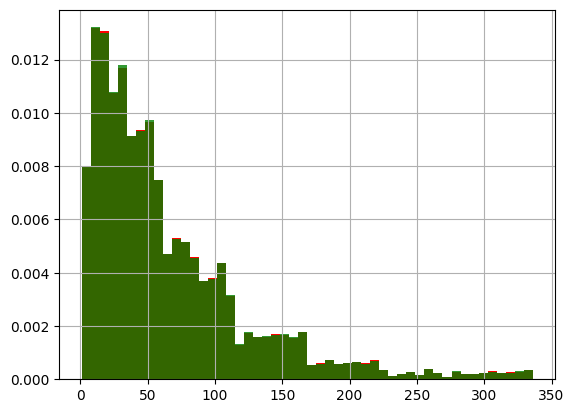

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins = 50, density = True, ax = ax, color = 'red')

# data after CCA
new_df['training_hours'].hist(bins = 50, density = True, ax = ax, alpha = 0.8, color = 'green')

plt.show()

 If we look closely there is almost negligible difference even after CCA in the data.
 

### Plot Probability Density Function (PDF): Training hours

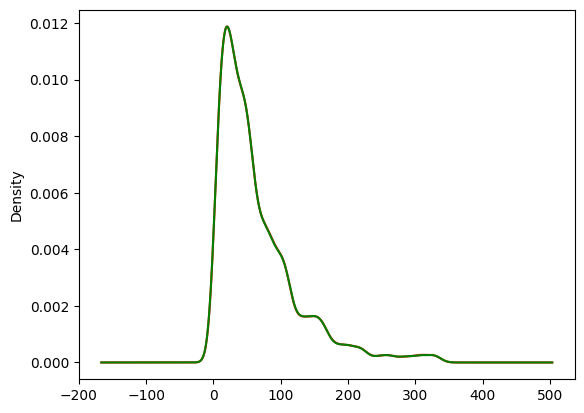

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original data
df['training_hours'].plot.density(color='red')
# New data
new_df['training_hours'].plot.density(color='green')
plt.show()

### Plot Histogram: City Development

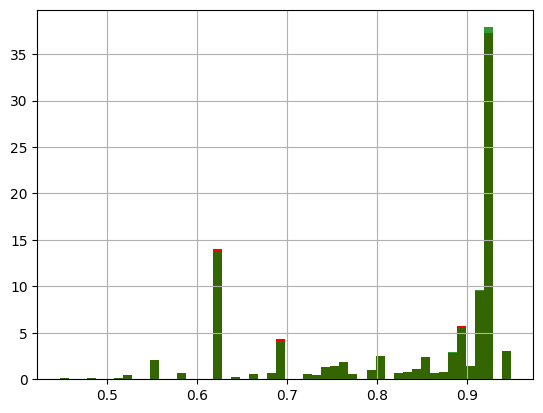

In [13]:
 fig = plt.figure()
ax = fig.add_subplot(111)
# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')
# new data
new_df['city_development_index'].hist(bins=50, ax=ax, density=True, color='green', alpha = 0.8)
plt.show()

### Plot PDF: City Development

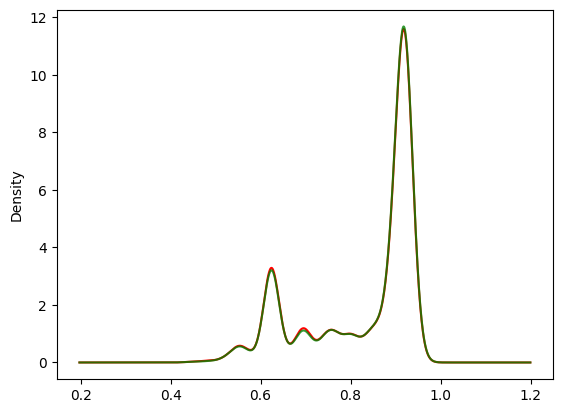

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original data
df['city_development_index'].plot.density(color = 'red')
# new data
new_df['city_development_index'].plot.density(color='green', alpha = 0.8)
plt.show()

### Plot Histogram: Experience

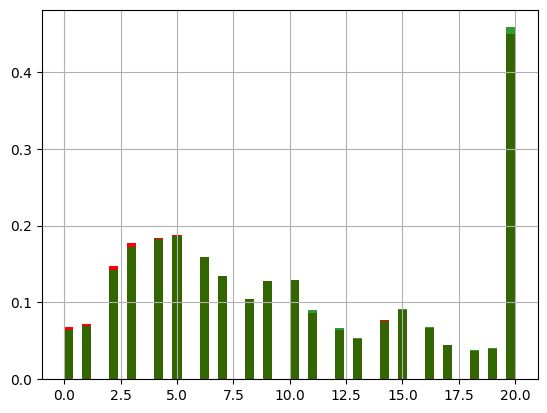

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original
df['experience'].hist(bins=50, ax=ax, density = True, color = 'red')
# new
new_df['experience'].hist(bins = 50, ax= ax, density = True, color = 'green', alpha = 0.8)
plt.show()

### Plot PDF: Experience


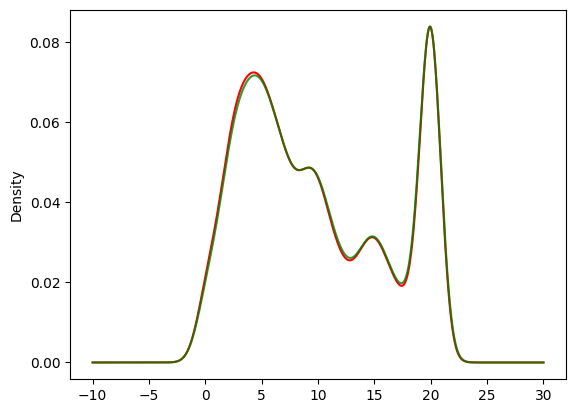

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original 
df['experience'].plot.density(color = 'red')
# new
new_df['experience'].plot.density(color = 'green', alpha= 0.8)
plt.show()

## CCA in Categorical Data


In [17]:
df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [18]:
df['enrolled_university'].value_counts()

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

### CCA Apply in Enrolled University

In [19]:
 temp = pd.concat([
     round(df['enrolled_university'].value_counts()/ len(df), 2),
     round(new_df['enrolled_university'].value_counts()/len(new_df), 2)],
                 axis= 1)

temp.columns = ['original', 'CCA']
temp

,original,CCA
enrolled_university,,
no_enrollment,0.72,0.74
Full time course,0.20,0.20
Part time course,0.06,0.06
